# Project

In [246]:
import requests
import json
import prettytable

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# code to: decode Months and Dates

In [247]:
code2month = {
    "M01" : "January",
    "M02" : "February",
    "M03" : "March",
    "M04" : "April",
    "M05" : "May",
    "M06" : "June",
    "M07" : "July",
    "M08" : "August",
    "M09" : "September",
    "M10" : "October",
    "M11" : "November",
    "M12" : "December"
}

month2number = {
    "January" : "01",
    "February" : "02",
    "March" : "03",
    "April" : "04",
    "May" : "05",
    "June" : "06",
    "July" : "07",
    "August" : "08",
    "September" : "09",
    "October" : "10",
    "November" : "11",
    "December" : "12"
}

def dateFrom(year, month):
    return "{}/{}".format(year,month2number[month])


# code to: decode the City/Town

In [248]:
code2citytown = {}
citytown2code = {}

file = open("bls-cities-and-towns.raw", "r")

count = 0
for line in file.readlines():
    count += 1
    ignore, code, citytownstate = line.rstrip().split(">", 2)[1].split(" ",2)
    citytown, state = citytownstate.split(",")
    code2citytown[code]=citytown
    citytown2code[citytown]=code
    #print("line: {} code: {} citytownstate: {}, citytown: {}, state: {}".format(count, code, citytownstate, citytown, state))

file.close()

def decodeCityTown(s):
    code = s[3:len(s)-2]
    return code2citytown[code]

import re
def searchDictionary(d, city):
    #print("searching for:", city)
    res = []
    for key in d.keys():
        if re.match(city, key):
            res.append(d[key])
    return res

def findCityTownCode(city):
    return searchDictionary(citytown2code, city)

def trimCityName(city):
    return city.replace(" city","").replace(" County/city","").replace(" town","")

In [249]:
city = "Dallas"
code = findCityTownCode(city)
print("city: {} trim: {} code: {}".format(city, trimCityName(city), code))

city: Dallas trim: Dallas code: ['CT4819000000000']


# code to: decode the State

In [250]:
code2state = {}

file = open("bls-state-codes.raw", "r")

count = 0
for line in file.readlines():
    count += 1
    ignore, code, state = line.rstrip().split(">", 2)[1].split(" ",2)
    code2state[code]=state
    #print("line: {} code: {} state: {}".format(count, code, state))

file.close()

def decodeState(s):
    code = s[5:7]
    return code2state[code]


# code to: decode the Measure

In [251]:
code2measure = {
    "03" : "unemployment-rate",
    "04" : "unemployment",
    "05" : "employment",
    "06" : "labor-force"
}

measure2Code = {
    "unemployment-rate" : "03",
    "unemployment" : "04",
    "employment" : "05",
    "labor-force" : "06"
}

def findMeasureCode(s):
    return measure2Code[s]

def decodeMeasure(s):
    code = s[len(s)-2:]
    return code2measure[code]


# input parameters for data request

In [434]:
cityListGeoRegional = ["Boston", "New York", "Philadelphia", "Baltimore", "Washington city"]
cityListPopSize = ["Phoenix", "Philadelphia", "San Antonio", "San Diego", "Dallas"]

cityList = cityListGeoRegional + cityListPopSize

startYear = 2008
endYear = 2017

seasonalAdjustment = "no"

measureList = ["labor-force", "employment", "unemployment", "unemployment-rate"]

In [435]:
cityList

['Boston',
 'New York',
 'Philadelphia',
 'Baltimore',
 'Washington city',
 'Phoenix',
 'Philadelphia',
 'San Antonio',
 'San Diego',
 'Dallas']

# construct the BLS Series ID

In [436]:
seriesIDs = []

dataSet = "LA"

if seasonalAdjustment == "yes":
    saCode = "S"
else:
    saCode = "U"

for city in cityList:
    cityCode = findCityTownCode(city)
    for measure in measureList:
        measureCode = findMeasureCode(measure)
        seriesID = "{}{}{}{}".format(dataSet, saCode, cityCode[0], measureCode)
        print("city: {} code: {} measure: {} code: {} seriesID: {}".format(city, cityCode, measure, measureCode, seriesID))
        seriesIDs.append(seriesID)

# an array of strings which represent BLS Series IDs
# seriesID = ['LAUMT423798000000003']
# seriesID = ['LAUCT426000000000003']
# seriesID = ["{}{}{}{}".format(dataSet, saCode, cityCode[0], measureCode)]

city: Boston code: ['CT2507000000000'] measure: labor-force code: 06 seriesID: LAUCT250700000000006
city: Boston code: ['CT2507000000000'] measure: employment code: 05 seriesID: LAUCT250700000000005
city: Boston code: ['CT2507000000000'] measure: unemployment code: 04 seriesID: LAUCT250700000000004
city: Boston code: ['CT2507000000000'] measure: unemployment-rate code: 03 seriesID: LAUCT250700000000003
city: New York code: ['CT3651000000000'] measure: labor-force code: 06 seriesID: LAUCT365100000000006
city: New York code: ['CT3651000000000'] measure: employment code: 05 seriesID: LAUCT365100000000005
city: New York code: ['CT3651000000000'] measure: unemployment code: 04 seriesID: LAUCT365100000000004
city: New York code: ['CT3651000000000'] measure: unemployment-rate code: 03 seriesID: LAUCT365100000000003
city: Philadelphia code: ['CT4260000000000'] measure: labor-force code: 06 seriesID: LAUCT426000000000006
city: Philadelphia code: ['CT4260000000000'] measure: employment code: 05 

In [437]:
print(seriesIDs)

['LAUCT250700000000006', 'LAUCT250700000000005', 'LAUCT250700000000004', 'LAUCT250700000000003', 'LAUCT365100000000006', 'LAUCT365100000000005', 'LAUCT365100000000004', 'LAUCT365100000000003', 'LAUCT426000000000006', 'LAUCT426000000000005', 'LAUCT426000000000004', 'LAUCT426000000000003', 'LAUCT240400000000006', 'LAUCT240400000000005', 'LAUCT240400000000004', 'LAUCT240400000000003', 'LAUCT115000000000006', 'LAUCT115000000000005', 'LAUCT115000000000004', 'LAUCT115000000000003', 'LAUCT045500000000006', 'LAUCT045500000000005', 'LAUCT045500000000004', 'LAUCT045500000000003', 'LAUCT426000000000006', 'LAUCT426000000000005', 'LAUCT426000000000004', 'LAUCT426000000000003', 'LAUCT486500000000006', 'LAUCT486500000000005', 'LAUCT486500000000004', 'LAUCT486500000000003', 'LAUCT066600000000006', 'LAUCT066600000000005', 'LAUCT066600000000004', 'LAUCT066600000000003', 'LAUCT481900000000006', 'LAUCT481900000000005', 'LAUCT481900000000004', 'LAUCT481900000000003']


# build the data request

In [438]:
headers = {'Content-type': 'application/json'}
request = json.dumps({"seriesid": seriesIDs,"startyear":"{}".format(startYear), "endyear":"{}".format(endYear)})

In [439]:
print(request)

{"seriesid": ["LAUCT250700000000006", "LAUCT250700000000005", "LAUCT250700000000004", "LAUCT250700000000003", "LAUCT365100000000006", "LAUCT365100000000005", "LAUCT365100000000004", "LAUCT365100000000003", "LAUCT426000000000006", "LAUCT426000000000005", "LAUCT426000000000004", "LAUCT426000000000003", "LAUCT240400000000006", "LAUCT240400000000005", "LAUCT240400000000004", "LAUCT240400000000003", "LAUCT115000000000006", "LAUCT115000000000005", "LAUCT115000000000004", "LAUCT115000000000003", "LAUCT045500000000006", "LAUCT045500000000005", "LAUCT045500000000004", "LAUCT045500000000003", "LAUCT426000000000006", "LAUCT426000000000005", "LAUCT426000000000004", "LAUCT426000000000003", "LAUCT486500000000006", "LAUCT486500000000005", "LAUCT486500000000004", "LAUCT486500000000003", "LAUCT066600000000006", "LAUCT066600000000005", "LAUCT066600000000004", "LAUCT066600000000003", "LAUCT481900000000006", "LAUCT481900000000005", "LAUCT481900000000004", "LAUCT481900000000003"], "startyear": "2008", "end

# send the request

In [440]:
# get the data using API
p = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', data=request, headers=headers)

# extract the JSON data payload from the response

In [441]:
json_data = json.loads(p.text)

# define the resulting dataset columns

In [442]:
colNames = ["seriesid","year","month","period","date","state","city","measure","value","footnotes"]

# extract and process the JSON payload into a *PrettyTable*  and a plain Python array...

In [443]:
data = []
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(colNames)
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        month = code2month[period]
        date = dateFrom(year, month)
        state = decodeState(seriesId)
        city = decodeCityTown(seriesId)
        measure = decodeMeasure(seriesId)
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            row = [seriesId,year,month,period,date,state,city,measure,value,footnotes[0:-1]]
            x.add_row(row)
            data.append(row)

# create a *DataFrame*

In [444]:
data[0:2]

[['LAUCT426000000000003',
  '2017',
  'August',
  'M08',
  '2017/08',
  'Pennsylvania',
  'Philadelphia County/city',
  'unemployment-rate',
  '6.7',
  'Preliminary.'],
 ['LAUCT426000000000003',
  '2017',
  'July',
  'M07',
  '2017/07',
  'Pennsylvania',
  'Philadelphia County/city',
  'unemployment-rate',
  '6.9',
  '']]

In [445]:
dfLaborForce = pd.DataFrame(data, columns=colNames)

In [446]:
dfLaborForce.head()

,seriesid,year,month,period,date,state,city,measure,value,footnotes
0,LAUCT426000000000003,2017,August,M08,2017/08,Pennsylvania,Philadelphia County/city,unemployment-rate,6.7,Preliminary.
1,LAUCT426000000000003,2017,July,M07,2017/07,Pennsylvania,Philadelphia County/city,unemployment-rate,6.9,
2,LAUCT426000000000003,2017,June,M06,2017/06,Pennsylvania,Philadelphia County/city,unemployment-rate,6.4,
3,LAUCT426000000000003,2017,May,M05,2017/05,Pennsylvania,Philadelphia County/city,unemployment-rate,6.7,
4,LAUCT426000000000003,2017,April,M04,2017/04,Pennsylvania,Philadelphia County/city,unemployment-rate,5.9,


In [447]:
dfLaborForce[dfLaborForce.month=="July"].head()

,seriesid,year,month,period,date,state,city,measure,value,footnotes
1,LAUCT426000000000003,2017,July,M07,2017/07,Pennsylvania,Philadelphia County/city,unemployment-rate,6.9,
13,LAUCT426000000000003,2016,July,M07,2016/07,Pennsylvania,Philadelphia County/city,unemployment-rate,7.6,
25,LAUCT426000000000003,2015,July,M07,2015/07,Pennsylvania,Philadelphia County/city,unemployment-rate,8.0,
37,LAUCT426000000000003,2014,July,M07,2014/07,Pennsylvania,Philadelphia County/city,unemployment-rate,8.9,
49,LAUCT426000000000003,2013,July,M07,2013/07,Pennsylvania,Philadelphia County/city,unemployment-rate,11.0,


In [448]:
dfLaborForceSelect = dfLaborForce[dfLaborForce.month=="July"].copy()

In [449]:
dfLaborForceSelect.drop(['seriesid','month','period','date','footnotes'], axis=1, inplace=True)

In [450]:
dfLaborForceSelect.rename(columns={"year": "Year", "state": "State", "city": "City", "measure": "Measure", "value": "Value"}, inplace=True)

In [451]:
dfLaborForceSelect.head()

,Year,State,City,Measure,Value
1,2017,Pennsylvania,Philadelphia County/city,unemployment-rate,6.9
13,2016,Pennsylvania,Philadelphia County/city,unemployment-rate,7.6
25,2015,Pennsylvania,Philadelphia County/city,unemployment-rate,8.0
37,2014,Pennsylvania,Philadelphia County/city,unemployment-rate,8.9
49,2013,Pennsylvania,Philadelphia County/city,unemployment-rate,11.0


# load the population data

In [452]:
pop1 = pd.read_csv("census-data-2000-2009.csv", sep=",", encoding='latin-1')
pop2 = pd.read_csv("census-data-2010-2016.csv", sep=",", encoding='latin-1')

In [453]:
data1t = pd.melt(pop1, id_vars=["sumlev", "STATE", "COUNTY", "place", "COUSUB", "name", "STATENAME"],
                 var_name="Date", 
                 value_name="Value")

data2t = pd.melt(pop2, id_vars=["SUMLEV", "STATE", "COUNTY", "PLACE", "COUSUB", "CONCIT", "PRIMGEO_FLAG", "FUNCSTAT", "NAME", "STNAME"], 
                 var_name="Date", 
                 value_name="Value")

In [454]:
data1ts = data1t[(data1t.sumlev==162) & (data1t.Date.str.contains("POP_"))].copy()
data2ts = data2t[(data2t.SUMLEV==162) & (data2t.Date.str.contains("POPESTIMATE"))].copy()

In [455]:
data1ts.drop(['sumlev','STATE','COUNTY','place','COUSUB'], axis=1, inplace=True)
data1ts.rename(columns={"name": "City", "STATENAME": "State"}, inplace=True)
data1ts.Date = data1ts.Date.str.replace("POP_", "")

data2ts.drop(['SUMLEV','STATE','COUNTY','PLACE','COUSUB','CONCIT','PRIMGEO_FLAG','FUNCSTAT'], axis=1, inplace=True)
data2ts.rename(columns={"NAME":"City", "STNAME":"State"}, inplace=True)
data2ts.Date = data2ts.Date.str.replace("POPESTIMATE", "")

In [456]:
print("len(data1ts): {} len(data2ts) {} total: {}".format(len(data1ts), len(data2ts), len(data1ts)+len(data2ts)))
frames = [data1ts, data2ts]
dfPopulation = pd.concat(frames)
print("len(dfPopulation): {}".format(len(dfPopulation)))

len(data1ts): 195100 len(data2ts) 136570 total: 331670
len(dfPopulation): 331670


In [457]:
dfPopulation.head()

,City,State,Date,Value
163407,Abbeville city,Alabama,2000,2987
163408,Adamsville city,Alabama,2000,5069
163409,Addison town,Alabama,2000,724
163410,Akron town,Alabama,2000,449
163411,Alabaster city,Alabama,2000,24099


In [458]:
dfPopulation['Measure'] = "population"

In [459]:
dfPopulation.rename(columns={"Date": "Year"}, inplace=True)

In [460]:
dfPopulation.head()

,City,State,Year,Value,Measure
163407,Abbeville city,Alabama,2000,2987,population
163408,Adamsville city,Alabama,2000,5069,population
163409,Addison town,Alabama,2000,724,population
163410,Akron town,Alabama,2000,449,population
163411,Alabaster city,Alabama,2000,24099,population


# merge labor-force and population data

In [461]:
frames = [dfPopulation, dfLaborForceSelect]

In [462]:
df = pd.concat(frames)

In [463]:
df[(df.City == "Boston city") & (df.State == "Massachusetts") & (df.Year >= "2008")]

,City,Measure,State,Value,Year
845280,Boston city,population,Massachusetts,636748,2008
926983,Boston city,population,Massachusetts,645169,2009
191488,Boston city,population,Massachusetts,620701,2010
273073,Boston city,population,Massachusetts,630195,2011
354658,Boston city,population,Massachusetts,641911,2012
436243,Boston city,population,Massachusetts,651090,2013
517828,Boston city,population,Massachusetts,659180,2014
599413,Boston city,population,Massachusetts,665984,2015
680998,Boston city,population,Massachusetts,673184,2016
465,Boston city,unemployment-rate,Massachusetts,4.2,2017


# trim city names

In [464]:
df.City = [trimCityName(city) for city in df.City]

# plot labor-force and population

In [465]:
# city = "Boston"
# state = "Massachusetts"

city = "Philadelphia"
state = "Pennsylvania"

beginYear = "2008"
endYear = "2016"

In [466]:
def getData(measure):
    return df[(df.City == city) & (df.State == state) & (df.Year >= beginYear) & (df.Year <= endYear) & (df.Measure == measure)].sort_values(['Year'])

In [367]:
measure = "labor-force"
lfd = getData(measure)

In [368]:
measure = "population"
pop = getData(measure)

In [467]:
emp = getData("employment")

In [468]:
uem = getData("unemployment")

In [469]:
lfd

,City,Measure,State,Value,Year
341,Philadelphia,labor-force,Pennsylvania,641086,2008
329,Philadelphia,labor-force,Pennsylvania,663457,2009
317,Philadelphia,labor-force,Pennsylvania,696073,2010
305,Philadelphia,labor-force,Pennsylvania,698060,2011
293,Philadelphia,labor-force,Pennsylvania,709570,2012
281,Philadelphia,labor-force,Pennsylvania,705946,2013
269,Philadelphia,labor-force,Pennsylvania,698219,2014
257,Philadelphia,labor-force,Pennsylvania,701763,2015
245,Philadelphia,labor-force,Pennsylvania,715091,2016


In [470]:
pop

,City,Measure,State,Value,Year
879498,Philadelphia,population,Pennsylvania,1540351,2008
961201,Philadelphia,population,Pennsylvania,1547297,2009
225482,Philadelphia,population,Pennsylvania,1528427,2010
307067,Philadelphia,population,Pennsylvania,1539022,2011
388652,Philadelphia,population,Pennsylvania,1550379,2012
470237,Philadelphia,population,Pennsylvania,1555868,2013
551822,Philadelphia,population,Pennsylvania,1560609,2014
633407,Philadelphia,population,Pennsylvania,1564964,2015
714992,Philadelphia,population,Pennsylvania,1567872,2016


In [471]:
emp

,City,Measure,State,Value,Year
341,Philadelphia,employment,Pennsylvania,593590,2008
329,Philadelphia,employment,Pennsylvania,595015,2009
317,Philadelphia,employment,Pennsylvania,618211,2010
305,Philadelphia,employment,Pennsylvania,616582,2011
293,Philadelphia,employment,Pennsylvania,624624,2012
281,Philadelphia,employment,Pennsylvania,628376,2013
269,Philadelphia,employment,Pennsylvania,635793,2014
257,Philadelphia,employment,Pennsylvania,645338,2015
245,Philadelphia,employment,Pennsylvania,660808,2016


In [472]:
uem

,City,Measure,State,Value,Year
225,Philadelphia,unemployment,Pennsylvania,47496,2008
213,Philadelphia,unemployment,Pennsylvania,68442,2009
201,Philadelphia,unemployment,Pennsylvania,77862,2010
189,Philadelphia,unemployment,Pennsylvania,81478,2011
177,Philadelphia,unemployment,Pennsylvania,84946,2012
165,Philadelphia,unemployment,Pennsylvania,77570,2013
153,Philadelphia,unemployment,Pennsylvania,62426,2014
141,Philadelphia,unemployment,Pennsylvania,56425,2015
129,Philadelphia,unemployment,Pennsylvania,54283,2016


In [371]:
ratio = (lfd.Value.values.astype("int")/pop.Value.values.astype("int"))*100.0

In [372]:
ratio

array([ 41.61947504,  42.87845191,  45.54178904,  45.35737631,
        45.76751878,  45.37312934,  44.74016233,  44.84211777,  45.60901655])

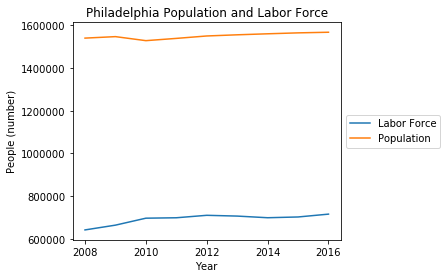

In [373]:
fig = plt.figure()
ax = plt.subplot(111)

y1 = lfd.Value.values.astype("int")
y2 = pop.Value.values.astype("int")
x = lfd.Year.values.astype("int")
#plt.plot(x, y1, label="Labor Force", x, y2, label="Population")
ax.plot(x, y1, label="Labor Force")
ax.plot(x, y2, label="Population")
plt.legend()

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title("{} Population and Labor Force".format(city))
ax.set_ylabel("People (number)")
ax.set_xlabel("Year")
plt.show()

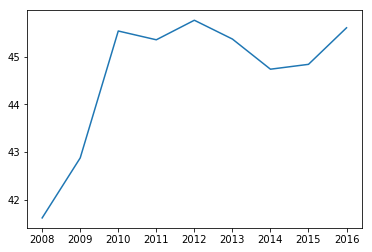

In [374]:
plt.plot(x, ratio)

In [375]:
measure = "unemployment-rate"
uer = getData(measure)

In [376]:
uer

,City,Measure,State,Value,Year
109,Philadelphia,unemployment-rate,Pennsylvania,7.4,2008
97,Philadelphia,unemployment-rate,Pennsylvania,10.3,2009
85,Philadelphia,unemployment-rate,Pennsylvania,11.2,2010
73,Philadelphia,unemployment-rate,Pennsylvania,11.7,2011
61,Philadelphia,unemployment-rate,Pennsylvania,12.0,2012
49,Philadelphia,unemployment-rate,Pennsylvania,11.0,2013
37,Philadelphia,unemployment-rate,Pennsylvania,8.9,2014
25,Philadelphia,unemployment-rate,Pennsylvania,8.0,2015
13,Philadelphia,unemployment-rate,Pennsylvania,7.6,2016


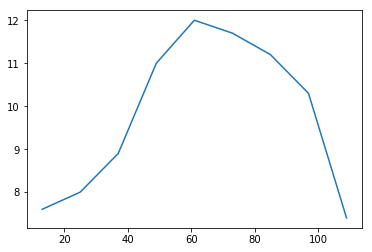

In [377]:
plt.plot(uer.Value)

# population changes

In [378]:
pop.Value.values

array([1540351, 1547297, 1528427, 1539022, 1550379, 1555868, 1560609,
       1564964, 1567872], dtype=object)

In [379]:
pop.Value.values[1:]

array([1547297, 1528427, 1539022, 1550379, 1555868, 1560609, 1564964,
       1567872], dtype=object)

In [380]:
pop.Value.values[:-1]

array([1540351, 1547297, 1528427, 1539022, 1550379, 1555868, 1560609,
       1564964], dtype=object)

In [381]:
deltas = pop.Value.values[1:] - pop.Value.values[:-1]

In [382]:
deltas

array([6946, -18870, 10595, 11357, 5489, 4741, 4355, 2908], dtype=object)

In [383]:
(deltas/pop.Value.values[:-1])*100.0

array([0.4509361827271836, -1.2195460858516498, 0.6931963384577738,
       0.7379361698533224, 0.3540424631654583, 0.30471736676890326,
       0.27905772682331065, 0.1858189709156249], dtype=object)

In [384]:
pop.Year.values[1:].astype("int")

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

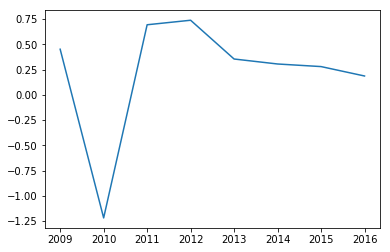

In [385]:
x = pop.Year.values[1:].astype("int")
y = (deltas/pop.Value.values[:-1])*100.0
plt.plot(x, y)

# labor force changes

In [389]:
lfd.Value.values.astype("int")

array([641086, 663457, 696073, 698060, 709570, 705946, 698219, 701763,
       715091])

In [391]:
deltas = lfd.Value.values[1:].astype("int") - lfd.Value.values[:-1].astype("int")

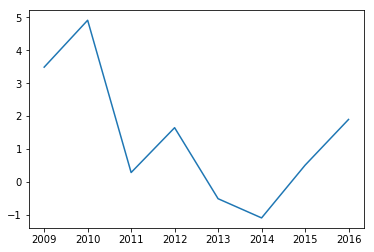

In [392]:
x = lfd.Year.values[1:].astype("int")
y = (deltas/lfd.Value.values[:-1].astype("int"))*100.0
plt.plot(x, y)

# can we plot both?

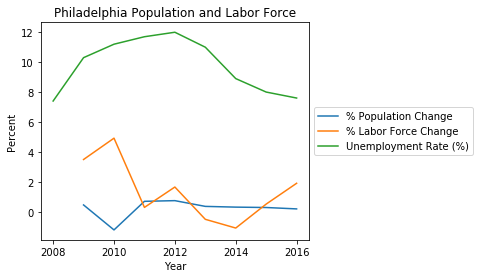

In [393]:
fig = plt.figure()
ax = plt.subplot(111)

popVals = pop.Value.values.astype("int")
lfdVals = lfd.Value.values.astype("int")

# population
x1 = pop.Year.values[1:].astype("int")
y1 = ((popVals[1:] - popVals[:-1])/popVals[:-1])*100.0

# labor force
x2 = lfd.Year.values[1:].astype("int")
y2 = ((lfdVals[1:] - lfdVals[:-1])/lfdVals[:-1])*100.0

# unemployment rate
x3 = uer.Year.values.astype("int")
y3 = uer.Value.values.astype("float")

ax.plot(x1, y1, label="% Population Change")
ax.plot(x2, y2, label="% Labor Force Change")
ax.plot(x3, y3, label="Unemployment Rate (%)")

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title("{} Population and Labor Force".format(city))
ax.set_ylabel("Percent")
ax.set_xlabel("Year")
plt.show()

In [398]:
pop.Year.values.astype("int")

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [397]:
popVals

array([1540351, 1547297, 1528427, 1539022, 1550379, 1555868, 1560609,
       1564964, 1567872])

In [395]:
lfdVals

array([641086, 663457, 696073, 698060, 709570, 705946, 698219, 701763,
       715091])

In [399]:
popVals[1:] - popVals[:-1]

array([  6946, -18870,  10595,  11357,   5489,   4741,   4355,   2908])

In [396]:
lfdVals[1:] - lfdVals[:-1]

array([22371, 32616,  1987, 11510, -3624, -7727,  3544, 13328])

In [400]:
summaryTable = pd.DataFrame(columns=["Year", "Population", "PopulationChange", "LaborForce", "LaborForceChange"])

In [473]:
summaryTable['Year'] = pop.Year.values.astype("int")
summaryTable['Population'] = popVals
popChange = [0]
for p in popVals[1:] - popVals[:-1]:
    popChange.append(p )
len(popChange)
summaryTable['PopulationChange'] = popChange
summaryTable['LaborForce'] = lfdVals
lfdChange = [0]
for l in lfdVals[1:] - lfdVals[:-1]:
    lfdChange.append(l)
summaryTable['LaborForceChange'] = lfdChange
summaryTable['UnemploymentRate'] = uer.Value.values
summaryTable['Employment'] = emp.Value.values
summaryTable['Unemployment'] = uem.Value.values


In [474]:
summaryTable

,Year,Population,PopulationChange,LaborForce,LaborForceChange,UnemploymentRate,Employment,Unemployment
0,2008,1540351,0,641086,0,7.4,593590,47496
1,2009,1547297,6946,663457,22371,10.3,595015,68442
2,2010,1528427,-18870,696073,32616,11.2,618211,77862
3,2011,1539022,10595,698060,1987,11.7,616582,81478
4,2012,1550379,11357,709570,11510,12.0,624624,84946
5,2013,1555868,5489,705946,-3624,11.0,628376,77570
6,2014,1560609,4741,698219,-7727,8.9,635793,62426
7,2015,1564964,4355,701763,3544,8.0,645338,56425
8,2016,1567872,2908,715091,13328,7.6,660808,54283


In [433]:
(715091-641086)/641086

0.11543693045862802

In [475]:
660808+54283

715091

In [477]:
emp.Value.values.astype("int")[1:]-emp.Value.values.astype("int")[:-1]

array([ 1425, 23196, -1629,  8042,  3752,  7417,  9545, 15470])

In [478]:
uem.Value.values.astype("int")[1:]-uem.Value.values.astype("int")[:-1]

array([ 20946,   9420,   3616,   3468,  -7376, -15144,  -6001,  -2142])

In [481]:
def delta(a,b):
    return ((b-a)/a)*100.0

In [482]:
delta(47496, 54283)

14.289624389422267

In [483]:
delta(593590, 660808)

11.323977829815192

# plot ratio and unemployment rate

ValueError: x and y must have same first dimension, but have shapes (8,) and (9,)

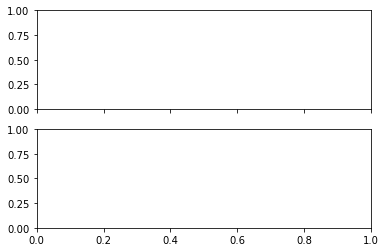

In [394]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex=True)
ax1.plot(x, ratio)
ax1.set_title("Ratio of Labor Force to Population")
ax2.plot(x, uer.Value.values.astype("float"))
ax2.set_title("Unemployment Rate")

# plot per city (1) population and labor force, (2) ratio and unemployment rate

In [312]:
#cityListGeoRegional = ["Boston", "New York", "Philadelphia", "Baltimore", "Washington city"]
#cityListPopSize = ["Phoenix", "Philadelphia", "San Antonio", "San Diego", "Dallas"]

cityListGeoRegionalX = ["Boston", "New York", "Philadelphia", "Baltimore", "Washington"]
stateListGeoRegionalX = ["Massachusetts", "New York", "Pennsylvania", "Maryland", "District of Columbia"]
cityListPopSizeX = ["Phoenix", "Philadelphia", "San Antonio", "San Diego", "Dallas"]
stateListPopSizeX = ["Arizona", "Pennsylvania", "Texas", "California", "Texas"]

In [313]:
cityListX = cityListGeoRegionalX
stateListX = stateListGeoRegionalX

beginYearX = "2008"
endYearX = "2016"

cityStateList = []
for i in range(len(cityListX)):
    cityStateList.append((cityListX[i], stateListX[i]))

In [314]:
cityStateList

[('Boston', 'Massachusetts'),
 ('New York', 'New York'),
 ('Philadelphia', 'Pennsylvania'),
 ('Baltimore', 'Maryland'),
 ('Washington', 'District of Columbia')]

In [317]:
frames = []
for city, state in cityStateList:
    dfs = df[(df.City==city) & (df.State==state) & (df.Year>=beginYearX) & (df.Year<=endYearX)].sort_values(['Measure', 'Year'])
    print(dfs)
    frames.append(dfs)

          City            Measure          State   Value  Year
921     Boston        labor-force  Massachusetts  328248  2008
909     Boston        labor-force  Massachusetts  330383  2009
897     Boston        labor-force  Massachusetts  342167  2010
885     Boston        labor-force  Massachusetts  343798  2011
873     Boston        labor-force  Massachusetts  348666  2012
861     Boston        labor-force  Massachusetts  353715  2013
849     Boston        labor-force  Massachusetts  361170  2014
837     Boston        labor-force  Massachusetts  366870  2015
825     Boston        labor-force  Massachusetts  369136  2016
845280  Boston         population  Massachusetts  636748  2008
926983  Boston         population  Massachusetts  645169  2009
191488  Boston         population  Massachusetts  620701  2010
273073  Boston         population  Massachusetts  630195  2011
354658  Boston         population  Massachusetts  641911  2012
436243  Boston         population  Massachusetts  65109

In [318]:
frames

[          City            Measure          State   Value  Year
 921     Boston        labor-force  Massachusetts  328248  2008
 909     Boston        labor-force  Massachusetts  330383  2009
 897     Boston        labor-force  Massachusetts  342167  2010
 885     Boston        labor-force  Massachusetts  343798  2011
 873     Boston        labor-force  Massachusetts  348666  2012
 861     Boston        labor-force  Massachusetts  353715  2013
 849     Boston        labor-force  Massachusetts  361170  2014
 837     Boston        labor-force  Massachusetts  366870  2015
 825     Boston        labor-force  Massachusetts  369136  2016
 845280  Boston         population  Massachusetts  636748  2008
 926983  Boston         population  Massachusetts  645169  2009
 191488  Boston         population  Massachusetts  620701  2010
 273073  Boston         population  Massachusetts  630195  2011
 354658  Boston         population  Massachusetts  641911  2012
 436243  Boston         population  Mass

In [319]:
dfx = pd.DataFrame(columns=["City","Measure","State","Value","Year"])

In [320]:
dfx = pd.concat(frames)

In [322]:
dfx

,City,Measure,State,Value,Year
921,Boston,labor-force,Massachusetts,328248,2008
909,Boston,labor-force,Massachusetts,330383,2009
897,Boston,labor-force,Massachusetts,342167,2010
885,Boston,labor-force,Massachusetts,343798,2011
873,Boston,labor-force,Massachusetts,348666,2012
861,Boston,labor-force,Massachusetts,353715,2013
849,Boston,labor-force,Massachusetts,361170,2014
837,Boston,labor-force,Massachusetts,366870,2015
825,Boston,labor-force,Massachusetts,369136,2016
845280,Boston,population,Massachusetts,636748,2008


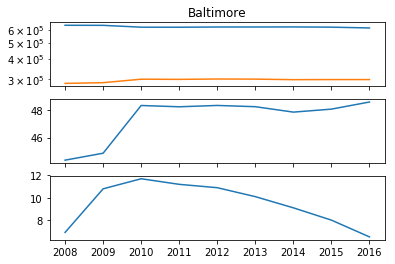

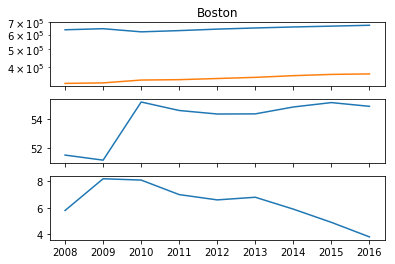

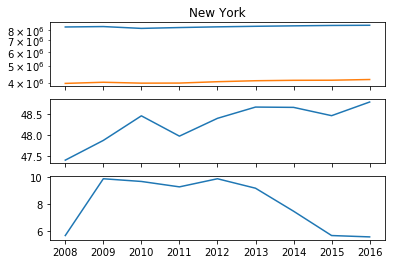

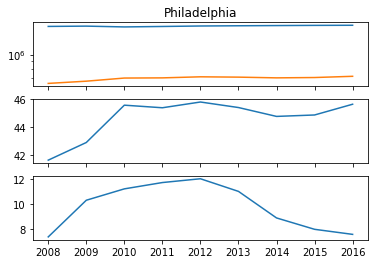

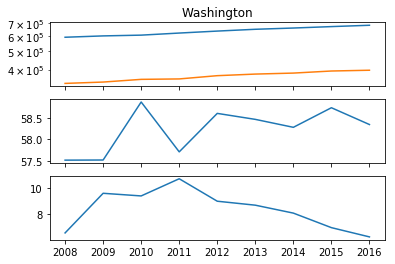

In [323]:
for key, grp in dfx.groupby(['City']): 
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, sharex=True)
    srt = grp.sort_values(['Measure','Year'])
    x = srt[srt.Measure=="population"].Year.values.astype("int")
    y1 = srt[srt.Measure=="population"].Value.values.astype("int")
    y2 = srt[srt.Measure=="labor-force"].Value.values.astype("int")
    ax1.set_title(key)
    ax1.plot(x, y1, x, y2)
    ax1.set_yscale("log")
    ratios = (srt[srt.Measure=="labor-force"].Value.values.astype("int")/
              srt[srt.Measure=="population"].Value.values.astype("int"))*100.0
    ax2.plot(x, ratios)
    y = srt[grp.Measure=="unemployment-rate"].Value.values.astype("float")
    ax3.plot(x, y)

Baltimore
             City            Measure     State   Value  Year
1968    Baltimore        labor-force  Maryland  283068  2008
844915  Baltimore         population  Maryland  638091  2008
1852    Baltimore  unemployment-rate  Maryland     6.9  2008
1956    Baltimore        labor-force  Maryland  285986  2009
926618  Baltimore         population  Maryland  637418  2009
1840    Baltimore  unemployment-rate  Maryland    10.8  2009
1944    Baltimore        labor-force  Maryland  300254  2010
191122  Baltimore         population  Maryland  621195  2010
1828    Baltimore  unemployment-rate  Maryland    11.7  2010
1932    Baltimore        labor-force  Maryland  299490  2011
272707  Baltimore         population  Maryland  620815  2011
1816    Baltimore  unemployment-rate  Maryland    11.2  2011
1920    Baltimore        labor-force  Maryland  301013  2012
354292  Baltimore         population  Maryland  622722  2012
1804    Baltimore  unemployment-rate  Maryland    10.9  2012
1908    Baltim

  45.37312934  44.74016233  44.84211777  45.60901655]
Washington
              City            Measure                 State   Value  Year
2085    Washington        labor-force  District of Columbia  339374  2008
822044  Washington         population  District of Columbia  590074  2008
1271    Washington  unemployment-rate  District of Columbia     6.6  2008
2073    Washington        labor-force  District of Columbia  344905  2009
903747  Washington         population  District of Columbia  599657  2009
1259    Washington  unemployment-rate  District of Columbia     9.6  2009
2061    Washington        labor-force  District of Columbia  356243  2010
168196  Washington         population  District of Columbia  605183  2010
1247    Washington  unemployment-rate  District of Columbia     9.4  2010
2049    Washington        labor-force  District of Columbia  358056  2011
249781  Washington         population  District of Columbia  620477  2011
1235    Washington  unemployment-rate  District

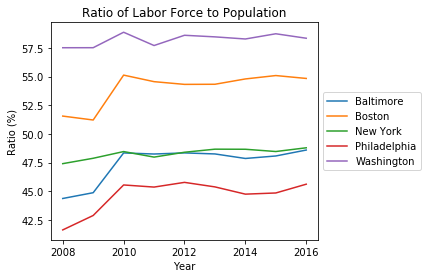

In [324]:
fig, ax = plt.subplots()

for key, grp in dfx.groupby(['City']):
    srt = grp.sort_values(['Year','Measure'])
    years = srt[srt.Measure=="labor-force"].Year.values.astype("int")
    lfnData = srt[srt.Measure=="labor-force"].Value.values.astype("int")
    popData = srt[srt.Measure=="population"].Value.values.astype("int")
    ratios = (lfnData/popData)*100.0
    print(key)
    print(srt)
    print("Years:", years)
    print("Labor Force:", lfnData)
    print("Population:", popData)
    print("Ratios:", ratios)
    ax.plot(years, ratios, label=key)
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title("Ratio of Labor Force to Population")
ax.set_ylabel("Ratio (%)")
ax.set_xlabel("Year")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


key: Dallas city, grp: <class 'pandas.core.frame.DataFrame'>


NameError: name 'datetime' is not defined

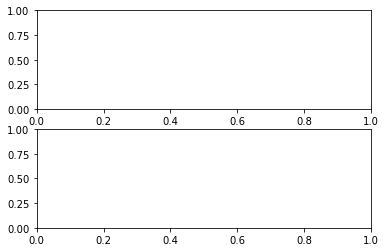

In [25]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
from pandas.tools.plotting import andrews_curves

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)

for key, grp in df.groupby(['city']): 
    #ax2.plot(grp['date'], grp['value'], label = "{}".format(key))
    print("key: {}, grp: {}".format(key, type(grp)))
    x = list([datetime.datetime.strptime(d,'%Y/%m').date() for d in grp.date.values])
    y = list(grp.value.values)
    ax2.plot(x, y, label=key)

plt.legend(loc='right')    
plt.show()

In [26]:
df.head()

,seriesid,year,month,period,date,state,city,measure,value,footnotes
0,LAUCT426000000000003,2017,August,M08,2017/08,Pennsylvania,Philadelphia County/city,unemployment-rate,6.7,Preliminary.
1,LAUCT426000000000003,2017,July,M07,2017/07,Pennsylvania,Philadelphia County/city,unemployment-rate,6.9,
2,LAUCT426000000000003,2017,June,M06,2017/06,Pennsylvania,Philadelphia County/city,unemployment-rate,6.4,
3,LAUCT426000000000003,2017,May,M05,2017/05,Pennsylvania,Philadelphia County/city,unemployment-rate,6.7,
4,LAUCT426000000000003,2017,April,M04,2017/04,Pennsylvania,Philadelphia County/city,unemployment-rate,5.9,


In [27]:
for key, grp in df.groupby(['city']):
    earliest = float(grp.sort_values(['date']).head(1).value.values[0])
    latest   = float(grp.sort_values(['date']).tail(1).value.values[0])
    print("city: {0:20s}\tearliest: {1}\t latest: {2}\tdelta: {3:-5.2f}".format(key,earliest,latest,latest-earliest))


city: Dallas city         	earliest: 4.9	 latest: 4.1	delta: -0.80
city: Philadelphia County/city	earliest: 6.9	 latest: 6.7	delta: -0.20
city: Phoenix city        	earliest: 4.8	 latest: 4.4	delta: -0.40
city: San Antonio city    	earliest: 4.2	 latest: 3.7	delta: -0.50
city: San Diego city      	earliest: 5.1	 latest: 4.5	delta: -0.60


city: Dallas city         	earliest: 4.9	 latest: 4.1	delta: -0.80
city: Philadelphia County/city	earliest: 6.9	 latest: 6.7	delta: -0.20
city: Phoenix city        	earliest: 4.8	 latest: 4.4	delta: -0.40
city: San Antonio city    	earliest: 4.2	 latest: 3.7	delta: -0.50
city: San Diego city      	earliest: 5.1	 latest: 4.5	delta: -0.60


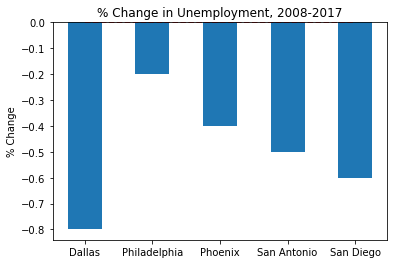

In [28]:
fig, ax = plt.subplots()

deltas = []
cities = []

for key, grp in df.groupby(['city']):
    earliest = float(grp.sort_values(['date']).head(1).value.values[0])
    latest   = float(grp.sort_values(['date']).tail(1).value.values[0])
    delta = latest-earliest
    print("city: {0:20s}\tearliest: {1}\t latest: {2}\tdelta: {3:-5.2f}".format(key,earliest,latest,delta))
    cities.append(trimCityName(key))
    deltas.append(delta)

ind = np.arange(len(deltas))
width = 0.5

ax.plot(ind, [0,0,0,0,0], "r--")
ax.bar(ind, deltas, width)

ax.set_ylabel('% Change')
ax.set_title('% Change in Unemployment, 2008-2017')
ax.set_xticks(ind)
ax.set_xticklabels((cities))


# load the national unemployment data
file created from data presented at: http://www.ncsl.org/research/labor-and-employment/national-employment-monthly-update.aspx

In [29]:
file = open("bls-national-unemployment.raw", "r")
data = []

count = 0
for line in file.readlines():
    count += 1
    line2 = re.sub(' +',' ', line.rstrip())
    fields = [f.strip() for f in line2.split("\t")]
    #print(count,fields)
    data.append(fields)
    
file.close()

In [30]:
data2 = []
for i in range(1, len(data)):
    #print(i, data[i])
    row = data[i]
    year = row[0]
    for j in range(1,len(row)):
        month = "{0:02}".format(j)
        #print(i,j,year,month,row[j])
        row2 = ["national-unemployment","{}/{}".format(year,month),row[j]]
        data2.append(row2)

In [31]:
df2 = pd.DataFrame(data2, columns=["measure","date","value"])
df2 = df2.sort_values('date')

In [32]:
df2.head()

,measure,date,value
105,national-unemployment,2008/01,4.9
106,national-unemployment,2008/02,4.8
107,national-unemployment,2008/03,5.1
108,national-unemployment,2008/04,5.0
109,national-unemployment,2008/05,5.5


# plot a city's data
(this is based on the Matplotlib example here: https://matplotlib.org/examples/api/date_demo.html )

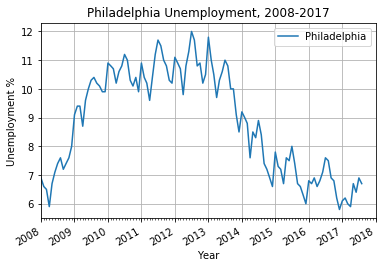

In [33]:
"""
================
Date tick labels
================

Show how to make date plots in matplotlib using date tick locators and
formatters.  See major_minor_demo1.py for more information on
controlling major and minor ticks

All matplotlib date plotting is done by converting date instances into
days since the 0001-01-01 UTC.  The conversion, tick locating and
formatting is done behind the scenes so this is most transparent to
you.  The dates module provides several converter functions date2num
and num2date

"""
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

cityName = "Philadelphia County/city"
cityData = df[df.city==cityName]
x = list([datetime.datetime.strptime(d,'%Y/%m').date() for d in cityData.date.values])
y = list(cityData.value.values)

fig, ax = plt.subplots()
ax.plot(x, y)


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(min(x).year, 1, 1)
datemax = datetime.date(max(x).year + 1, 1, 1)
ax.set_xlim(datemin, datemax)


# format the coords message box
def price(x):
    return '%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.title("{} Unemployment, 2008-2017".format(trimCityName(cityName)))
plt.xlabel("Year")
plt.ylabel("Unemployment %")
plt.legend([trimCityName(cityName)])
plt.show()

# plot the national data

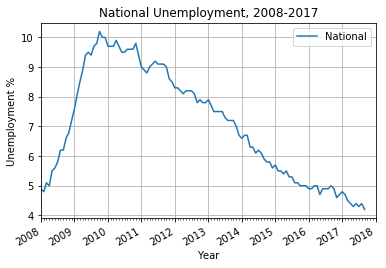

In [34]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

x = list([datetime.datetime.strptime(d,'%Y/%m').date() for d in df2.date.values])
y = list(df2.value.values)

fig, ax = plt.subplots()
ax.plot(x, y)


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(min(x).year, 1, 1)
datemax = datetime.date(max(x).year + 1, 1, 1)
ax.set_xlim(datemin, datemax)


# format the coords message box
def price(x):
    return '%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.title("National Unemployment, 2008-2017")
plt.xlabel("Year")
plt.ylabel("Unemployment %")
plt.legend(['National'])
plt.show()

# plot both national and city data

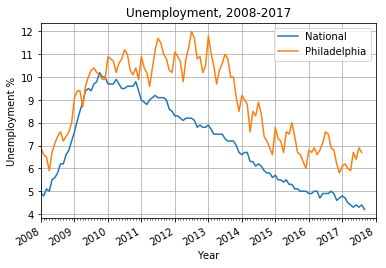

In [35]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

x1 = list([datetime.datetime.strptime(d,'%Y/%m').date() for d in df2.date.values])
y1 = list(df2.value.values)

cityName = "Philadelphia County/city"
cityData = df[df.city==cityName]
x2 = list([datetime.datetime.strptime(d,'%Y/%m').date() for d in cityData.date.values])
y2 = list(cityData.value.values)

fig, ax = plt.subplots()
ax.plot(x1, y1, x2, y2)


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(min(x).year, 1, 1)
datemax = datetime.date(max(x).year + 1, 1, 1)
ax.set_xlim(datemin, datemax)


# format the coords message box
def price(x):
    return '%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.title("Unemployment, 2008-2017")
plt.xlabel("Year")
plt.ylabel("Unemployment %")
plt.legend(['National',trimCityName(cityName)])
plt.show()

# plot the national and all the fetched cities data

key: Dallas city, grp: <class 'pandas.core.frame.DataFrame'>
key: Philadelphia County/city, grp: <class 'pandas.core.frame.DataFrame'>
key: Phoenix city, grp: <class 'pandas.core.frame.DataFrame'>
key: San Antonio city, grp: <class 'pandas.core.frame.DataFrame'>
key: San Diego city, grp: <class 'pandas.core.frame.DataFrame'>


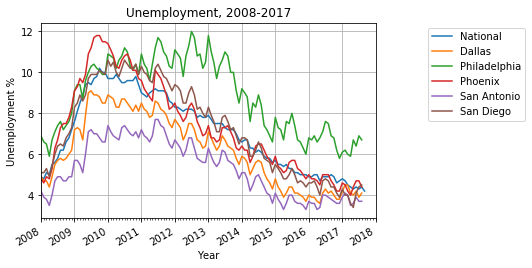

In [36]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()

# national data
x = list([datetime.datetime.strptime(d,'%Y/%m').date() for d in df2.date.values])
y = list(df2.value.values)
ax.plot(x, y, label="National")

for key, grp in df.groupby(['city']): 
    print("key: {}, grp: {}".format(key, type(grp)))
    x = list([datetime.datetime.strptime(d,'%Y/%m').date() for d in grp.date.values])
    y = list(grp.value.values)
    ax.plot(x, y, label=trimCityName(key))
    
# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(min(x).year, 1, 1)
datemax = datetime.date(max(x).year + 1, 1, 1)
ax.set_xlim(datemin, datemax)


# format the coords message box
def price(x):
    return '%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.title("Unemployment, 2008-2017")
plt.xlabel("Year")
plt.ylabel("Unemployment %")
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1.0), ncol=1)
plt.show()

# plot a lot of things together!

city: Dallas               earliest: 4.9 latest: 4.1 delta: -0.80
city: Philadelphia         earliest: 6.9 latest: 6.7 delta: -0.20
city: Phoenix              earliest: 4.8 latest: 4.4 delta: -0.40
city: San Antonio          earliest: 4.2 latest: 3.7 delta: -0.50
city: San Diego            earliest: 5.1 latest: 4.5 delta: -0.60


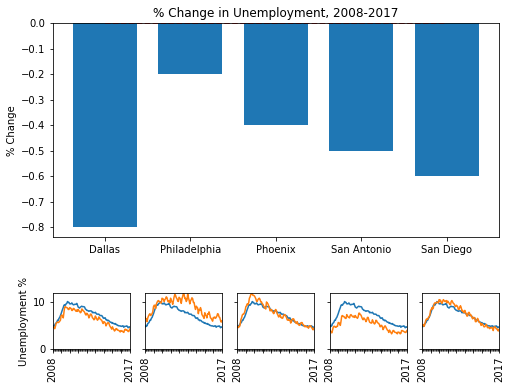

In [37]:
plt.figure(figsize=(8, 6))
axs = []
ax0 = plt.subplot2grid((6,5), (0,0), colspan=10, rowspan=4)
axs.append(plt.subplot2grid((5,5), (4,0), colspan=1))
axs.append(plt.subplot2grid((5,5), (4,1), colspan=1))
axs.append(plt.subplot2grid((5,5), (4,2), colspan=1))
axs.append(plt.subplot2grid((5,5), (4,3), colspan=1))
axs.append(plt.subplot2grid((5,5), (4,4), colspan=1))

deltas = []
cities = []

for key, grp in df.groupby(['city']):
    earliest = float(grp.sort_values(['date']).head(1).value.values[0])
    latest   = float(grp.sort_values(['date']).tail(1).value.values[0])
    delta = latest-earliest
    print("city: {0:20s} earliest: {1} latest: {2} delta: {3:-5.2f}".format(trimCityName(key),earliest,latest,delta))
    cities.append(trimCityName(key))
    deltas.append(delta)

ind = np.arange(len(deltas))
width = 0.75

ax0.plot(ind, [0,0,0,0,0], "r--")
ax0.bar(ind, deltas, width)

ax0.set_ylabel('% Change')
ax0.set_title('% Change in Unemployment, 2008-2017')
ax0.set_xticks(ind)
ax0.set_xticklabels((cities))



years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# national data
nat_x = list([datetime.datetime.strptime(d,'%Y/%m').date() for d in df2.date.values])
nat_y = list(df2.value.values)

count = -1
for key, grp in df.groupby(['city']): 
    count += 1
    #print("key: {}, grp: {}".format(key, type(grp)))
    x = list([datetime.datetime.strptime(d,'%Y/%m').date() for d in grp.date.values])
    y = list(grp.value.values)
    ax = axs[count]
    ax.plot(nat_x, nat_y, label='National')
    ax.plot(x, y, label=key)
    ax.set_ylim(0,12)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    if count >= 0:
        xtl = ax.get_xticklabels()
        for i in range(1,len(xtl)-2):
            tl = xtl[i]
            tl.set_visible(False)
    if count > 0:
        for tl in ax.get_yticklabels():
            tl.set_visible(False)
    # format the ticks
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)
    # set x-axis min and max
    datemin = datetime.date(min(x).year, 1, 1)
    datemax = datetime.date(max(x).year, 1, 1)
    ax.set_xlim(datemin, datemax)
    # set a y-axis label
    if count == 0:
        ax.set_ylabel("Unemployment %")
